In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [65]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [66]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [67]:
df.shape

(1338, 7)

In [68]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [69]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [70]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: >

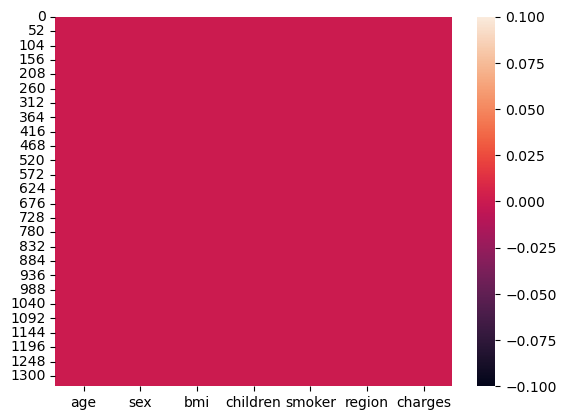

In [71]:
sns.heatmap(df.isnull())

In [72]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [75]:
df.loc[df["charges"]==" "]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [76]:
#checking for numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] !="object":
        numerical_col.append(i)

print ("Numerical Columns: ",numerical_col)

Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [77]:
#checking for categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] =="object":
        categorical_col.append(i)

print ("Categorical Columns: ",categorical_col)

Categorical Columns:  ['sex', 'smoker', 'region']


In [78]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

No. of unique values
age                         47
sex                          2
bmi                        548
children                     6
smoker                       2
region                       4
charges                   1337

These are the unique values present in the dataset.

In [79]:
#Dropping Charges Column
#df.drop("charges",axis = 1, inplace = True)

In [80]:
df.describe()


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

From the statistical summary, We can observe the following
1) The counts of all columns are the same, there is no missing values in the dataset
2) The mean value is greater than the median(50%)in all columns, this means that the data is skewed to the right
3) There is a huge diference between 75% and max meaning there are outliers present in the dataset
4) We can also notice the standard deviation,min and 25% percentile values

Univariate Analysis

male      676
female    662
Name: sex, dtype: int64


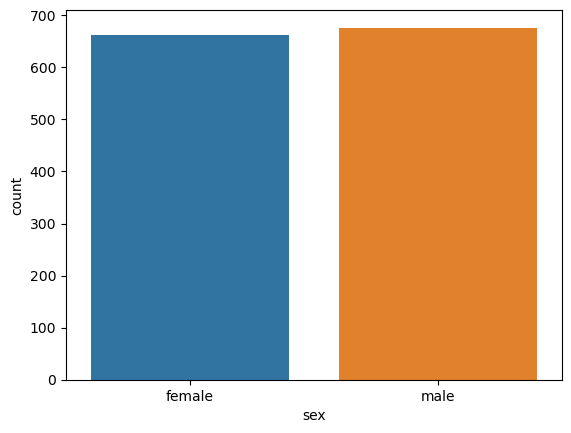

In [81]:
# Visualise the count of sex
ax = sns.countplot(x="sex",data = df)
print(df['sex'].value_counts())


We can observe that the count of female beneficiaries are slightly lower than male beneficiaries

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


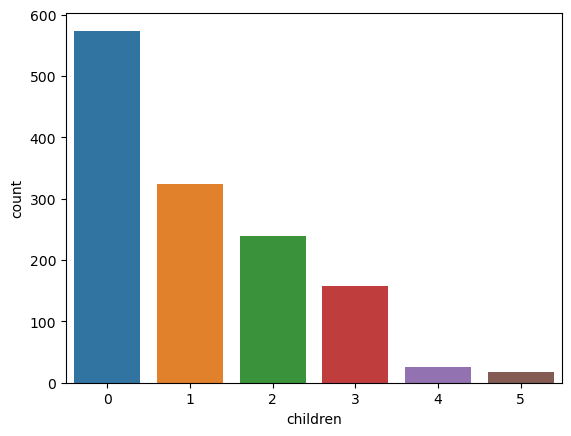

In [82]:
# Visualise the count of children 
ax = sns.countplot(x="children",data = df)
print(df['children'].value_counts())


We can observe that the beneficiaries with no children has the highest count while beneficiaries with 5 children has the lowest count.

no     1064
yes     274
Name: smoker, dtype: int64


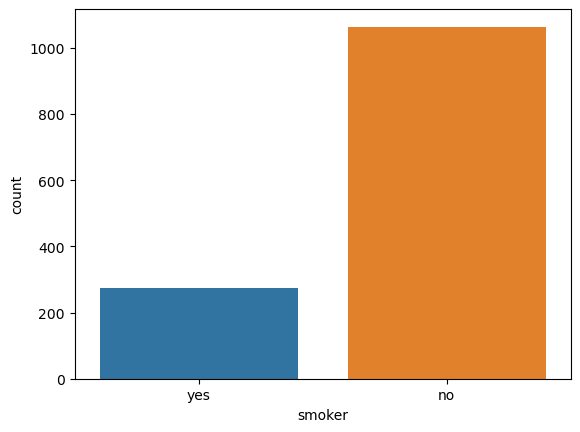

In [83]:
# Visualise the count of smokers 
ax = sns.countplot(x="smoker",data = df)
print(df['smoker'].value_counts())

We can observe that the beneficiaries that do not smoke are higher than those that smoke

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


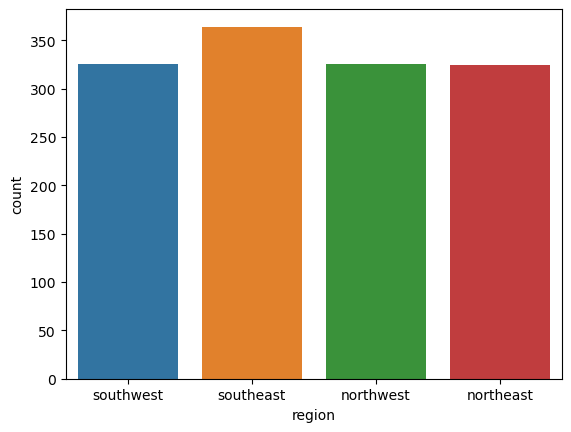

In [84]:
# Visualise the count of age of beneficiaries
ax = sns.countplot(x="region",data = df)
print(df['region'].value_counts())

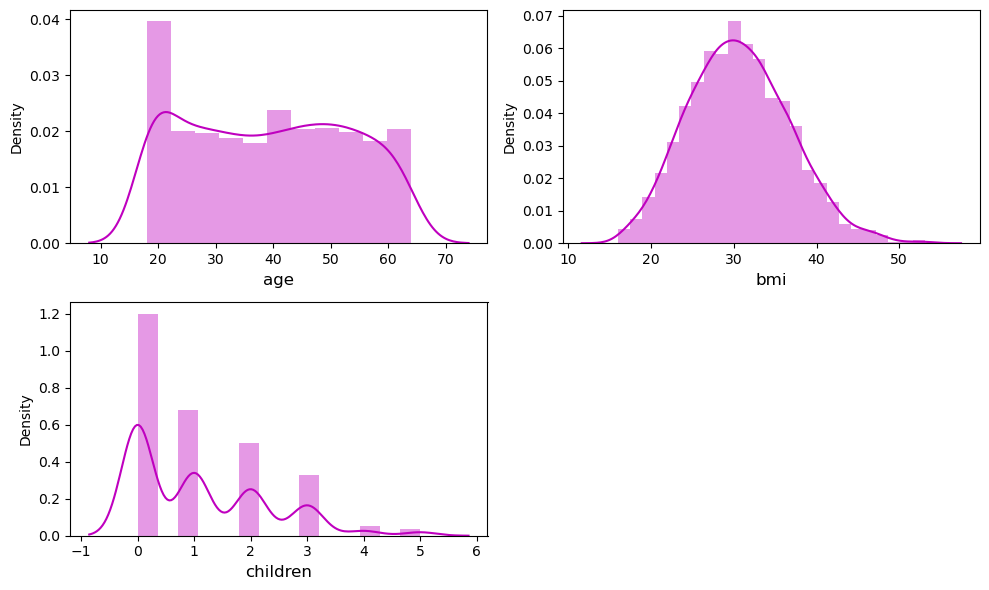

In [85]:
#To check data that have been distributed in remaining column
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Data looks normal except for children skewed to the left

Bivariate Analysis

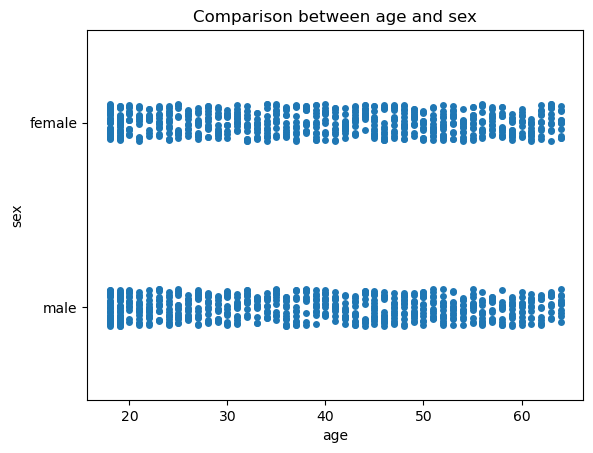

In [86]:
#comparing age and sex
plt.title("Comparison between age and sex")
sns.stripplot(x = "age",y ="sex", data=df)
plt.show()

There is no significant different, both features are of equal lengtth

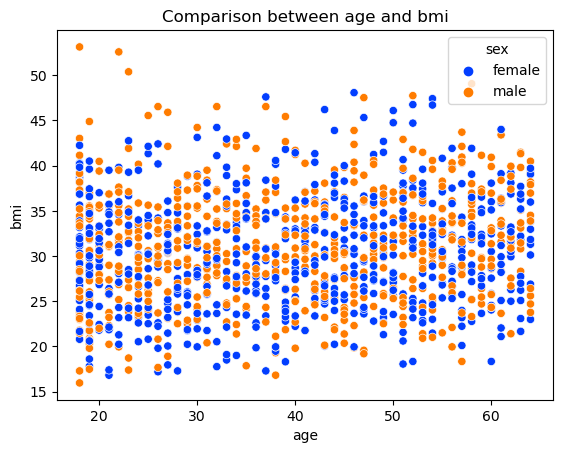

In [87]:
#comparing age and bmi
plt.title("Comparison between age and bmi")
sns.scatterplot(x = "age",y ="bmi", data=df,hue = 'sex', palette = "bright")
plt.show()

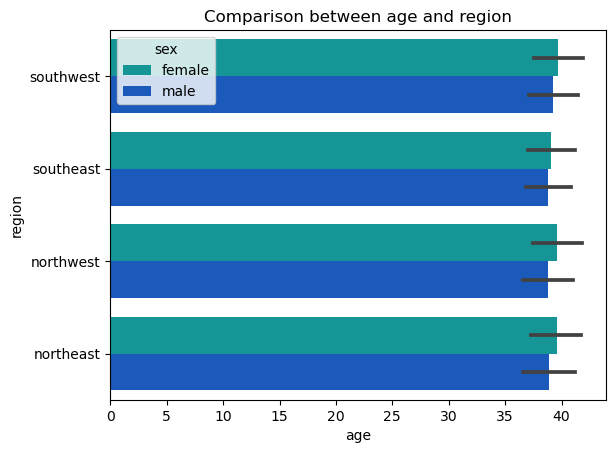

In [88]:
#comparing age and region
plt.title("Comparison between age and region")
sns.barplot(x = "age",y ="region", data=df,hue = 'sex', palette = "winter_r")
plt.show()

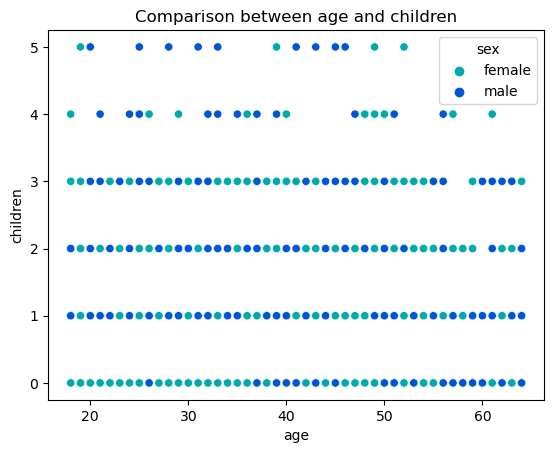

In [89]:
#comparing age and region
plt.title("Comparison between age and children")
sns.scatterplot(x = "age",y ="children", data=df,hue = 'sex', palette = "winter_r")
plt.show()

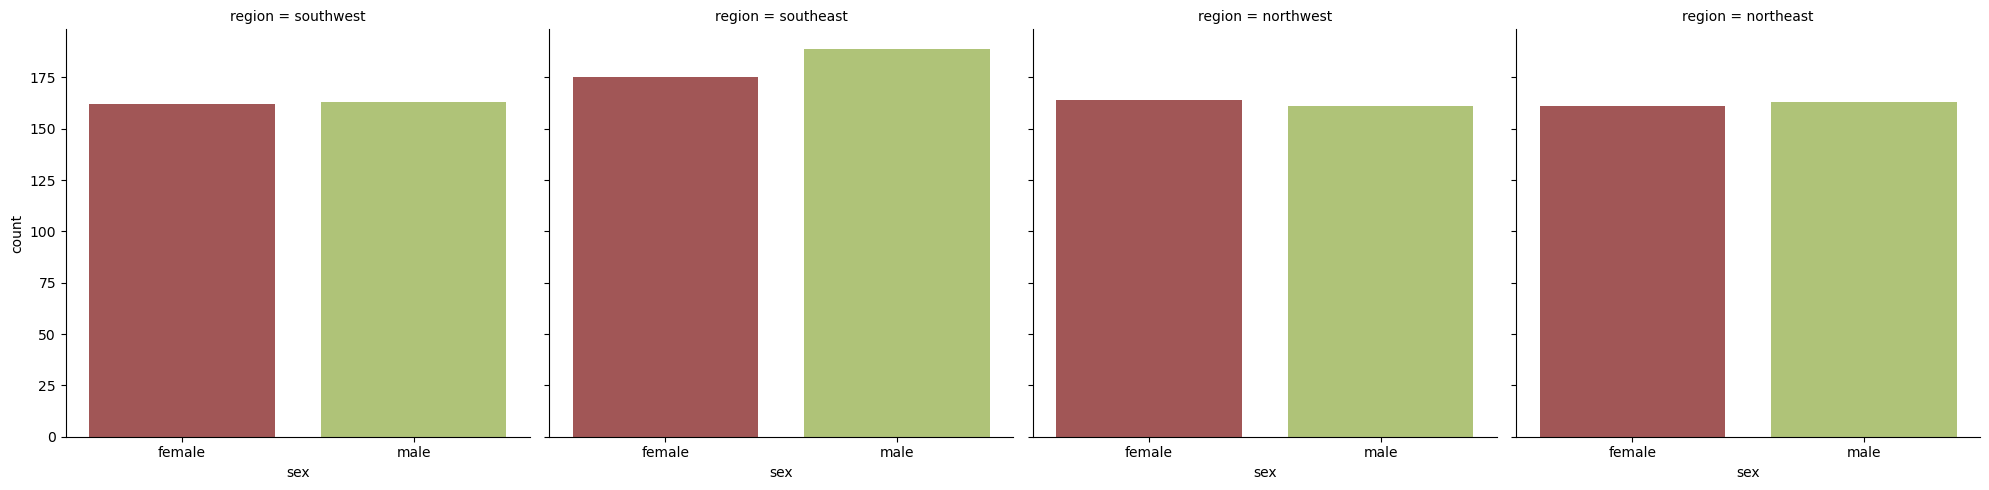

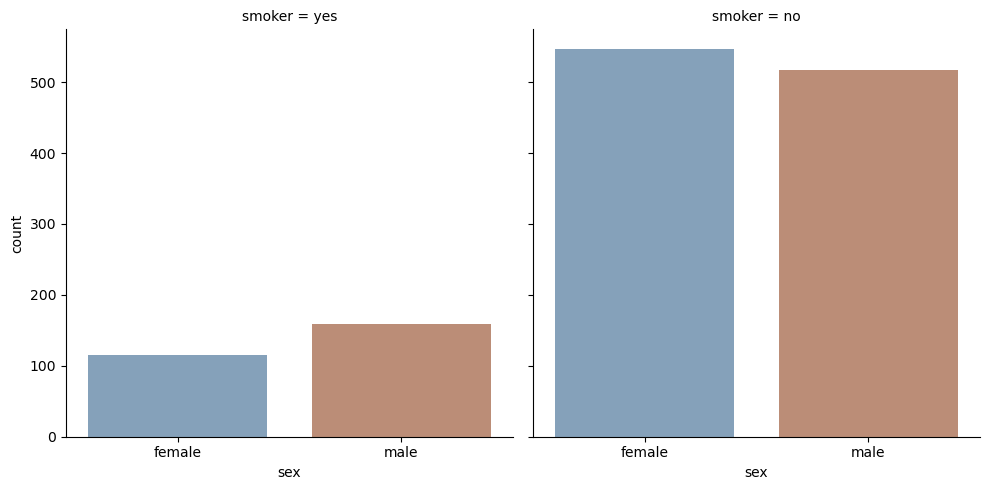

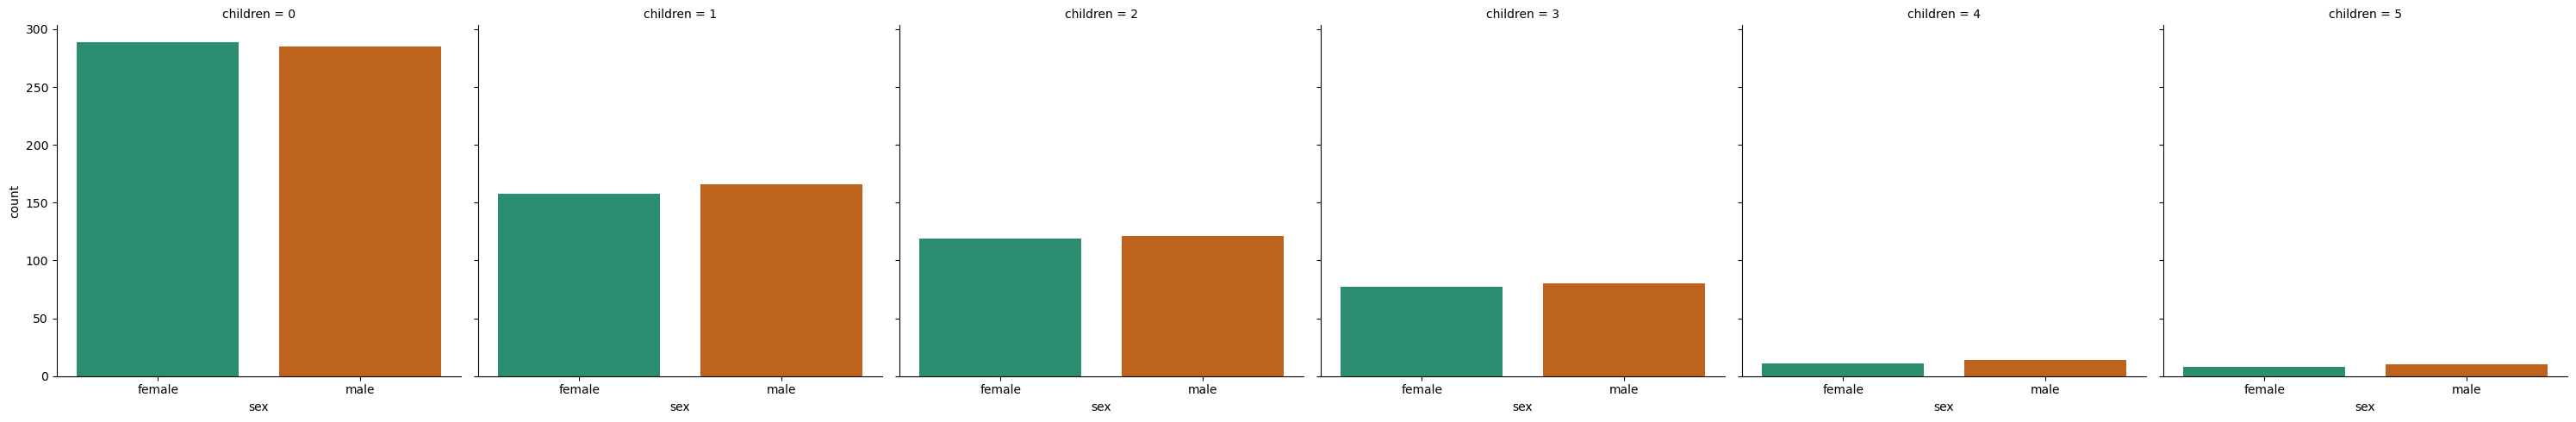

In [90]:

#checking sex and region
sns.catplot(x = "sex",col ="region", data=df,kind = 'count', palette = "tab20b_r")

#checking sex and smoker
sns.catplot(x = "sex",col ="smoker", data=df,kind = 'count', palette = "twilight_shifted")
#checking sex and children
sns.catplot(x = "sex",col ="children", data=df,kind = 'count', palette = "Dark2")
plt.show()




Multivariate Analysis

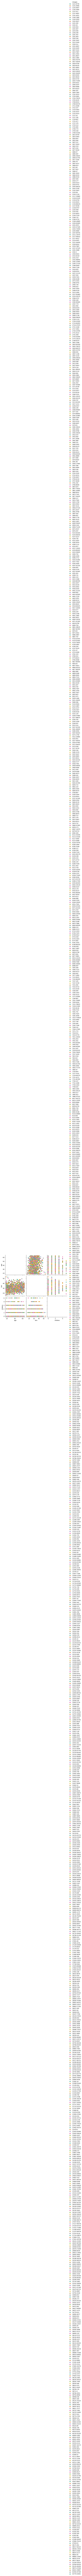

In [91]:
sns.pairplot(df,hue = "charges",palette = "Dark2")


The pairplot gives the pairwise relation between the features on the basis of the target 'charges'. On the diagnoal we notice the distribution

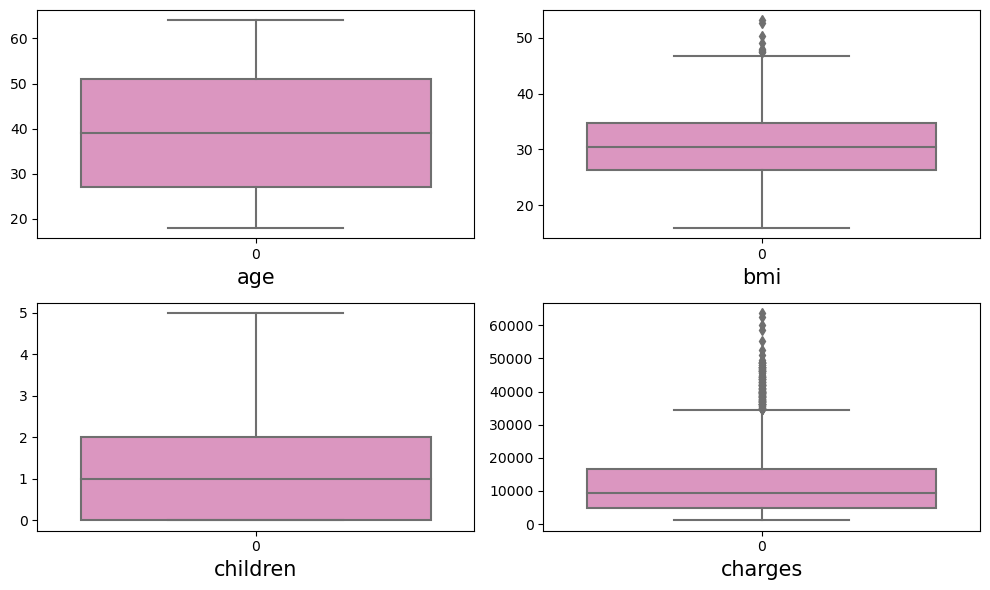

In [92]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (10,6),facecolor ='white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Only the bmi and charges column have outliers, others do not have

Checking for skewness

In [93]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     1.0     3.0  16884.92400
1      18  1.0  33.770         1     0.0     2.0   1725.55230
2      28  1.0  33.000         3     0.0     2.0   4449.46200
3      33  1.0  22.705         0     0.0     1.0  21984.47061
4      32  1.0  28.880         0     0.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     0.0     1.0  10600.54830
1334   18  0.0  31.920         0     0.0     0.0   2205.98080
1335   18  0.0  36.850         0     0.0     2.0   1629.83350
1336   21  0.0  25.800         0     0.0     3.0   2007.94500
1337   61  0.0  29.070         0     1.0     1.0  29141.36030

[1338 rows x 7 columns]

In [94]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

Smoker,charges and children columns have skewness in the data, since smoker is categorical, no need to remove skewnes. Skewness in Childen column can be removed using cube root method

Removing skewness

In [95]:
#removing skewness using cuberoot method
df['children'] = np.cbrt(df['children'])
df['charges'] = np.cbrt(df['charges'])

In [96]:
#checking skewness again, skewness should be -0.5 to 0.5
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     0.515183
dtype: float64

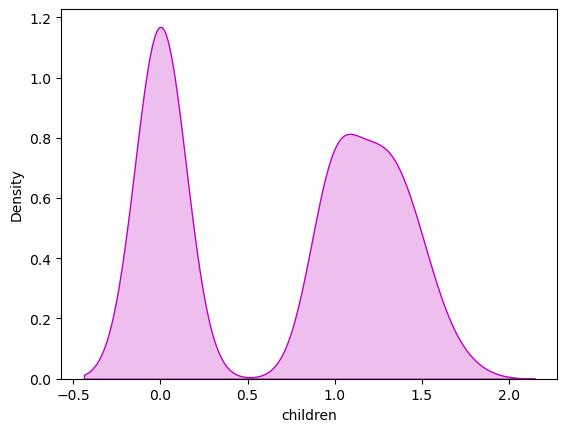

In [97]:
#lets visualize how the data has been distributed in children column after removing skewness
sns.distplot(df['children'], color='m', kde_kws={"shade": True}, hist=False)
plt.show()

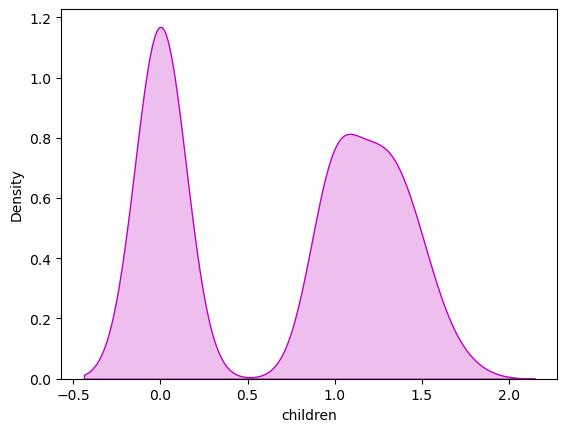

In [98]:
sns.distplot(df['children'], color='m', kde_kws={"shade": True}, hist=False)
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 73.3 KB


In [100]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     0.690044     0.204783   
std      14.049960     0.500160     6.098187     0.617662     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     1.259921     0.000000   
max      64.000000     1.000000    53.130000     1.709976     1.000000   

            region      charges  
count  1338.000000  1338.000000  
mean      1.515695    21.740315  
std       1.104885     6.609017  
min       0.000000    10.390777  
25%       1.000000    16.798411  
50%       2.000000    21.091088  
75%       2.000000    25.529963  
max       3.000000    39.952115

After encoding, we can see all column values, the count of all column values are the same meaning no null values in the dataset

In [101]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.048919 -0.025019  0.002127  0.451354
sex      -0.020856  1.000000  0.046371  0.016183  0.076185  0.004588  0.027560
bmi       0.109272  0.046371  1.000000  0.016515  0.003750  0.157566  0.156375
children  0.048919  0.016183  0.016515  1.000000  0.011829  0.014133  0.128511
smoker   -0.025019  0.076185  0.003750  0.011829  1.000000 -0.002181  0.732564
region    0.002127  0.004588  0.157566  0.014133 -0.002181  1.000000 -0.029807
charges   0.451354  0.027560  0.156375  0.128511  0.732564 -0.029807  1.000000

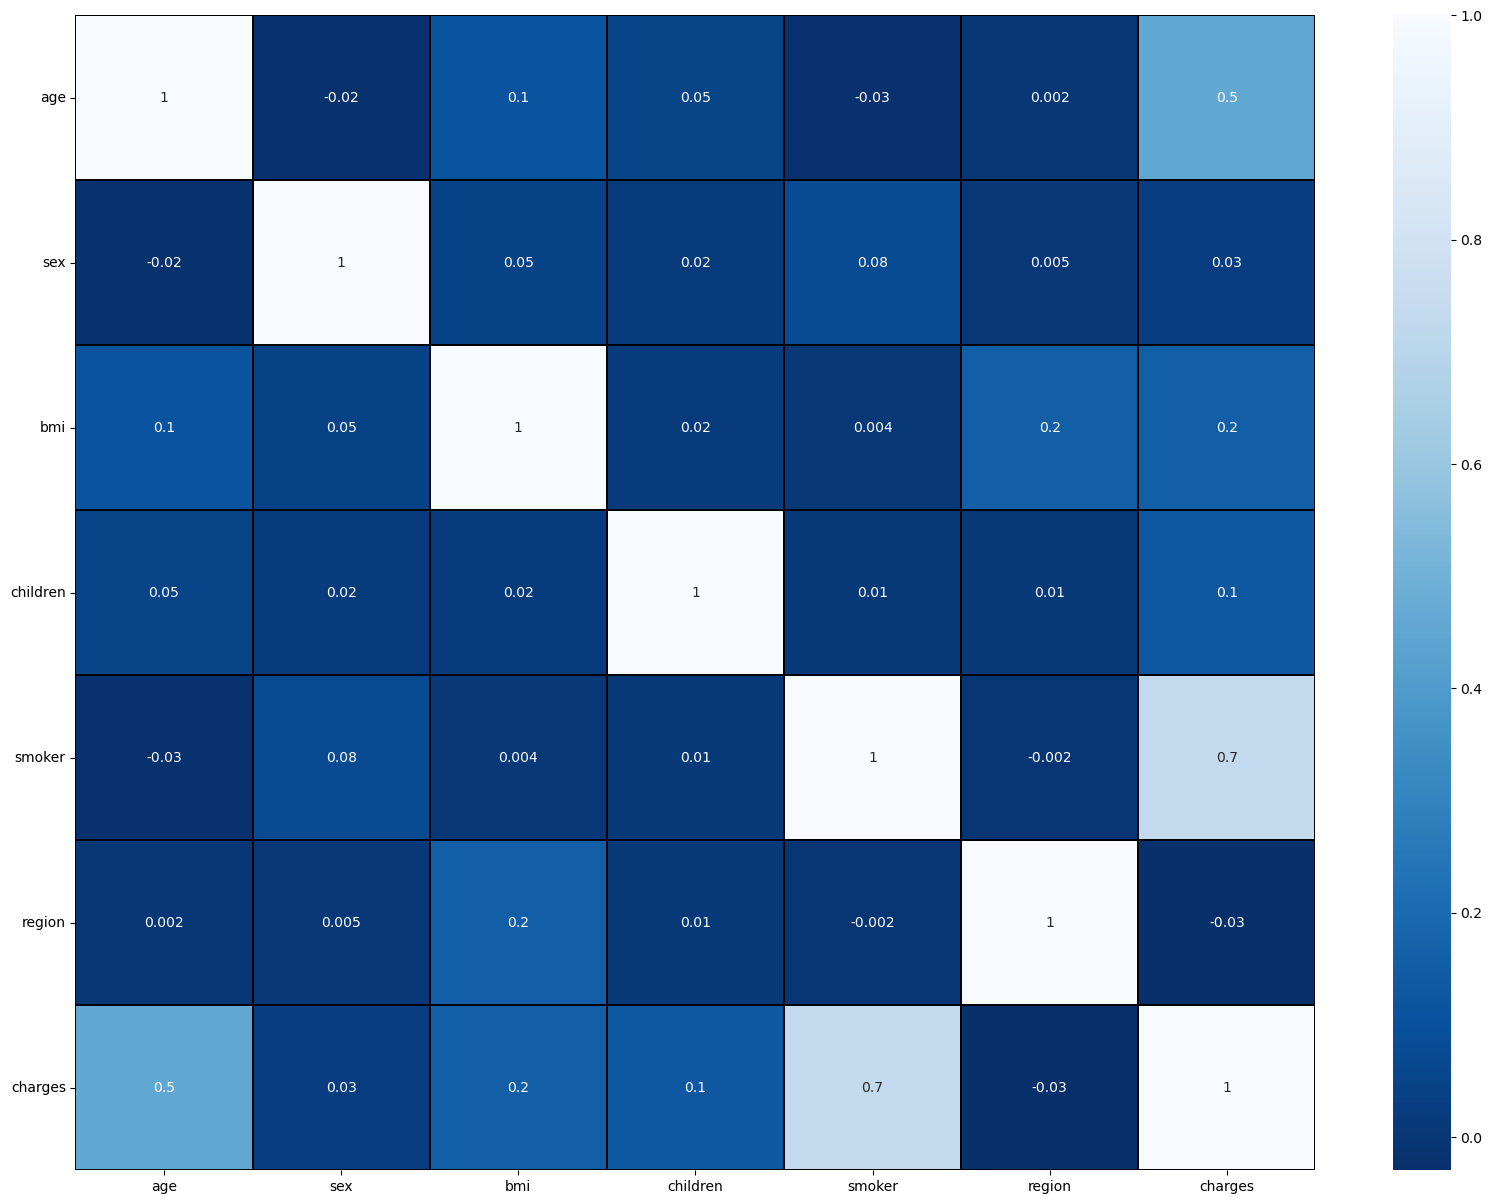

In [102]:
#visualising the correlation between the dependent and independent variables by plotting a heatmap
plt.figure(figsize =(20,15))
sns.heatmap(df.corr(),linewidths = 0.1,fmt = ".1g",linecolor = "black", annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [103]:
x = df.drop("charges", axis = 1)
y = df["charges"]

In [104]:
#Scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

age       sex       bmi  children    smoker    region
0    -1.438764 -1.010519 -0.453320 -1.117604  1.970587  1.343905
1    -1.509965  0.989591  0.509621  0.502009 -0.507463  0.438495
2    -0.797954  0.989591  0.383307  1.218282 -0.507463  0.438495
3    -0.441948  0.989591 -1.305531 -1.117604 -0.507463 -0.466915
4    -0.513149  0.989591 -0.292556 -1.117604 -0.507463 -0.466915
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.218282 -0.507463 -0.466915
1334 -1.509965 -1.010519  0.206139 -1.117604 -0.507463 -1.372326
1335 -1.509965 -1.010519  1.014878 -1.117604 -0.507463  0.438495
1336 -1.296362 -1.010519 -0.797813 -1.117604 -0.507463  1.343905
1337  1.551686 -1.010519 -0.261388 -1.117604  1.970587 -0.466915

[1338 rows x 6 columns]

In [105]:
#finding variance inflation for each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] =x.columns
vif

VIF values  features
0    1.015956       age
1    1.008844       sex
2    1.040656       bmi
3    1.003101  children
4    1.006551    smoker
5    1.025881    region

In [106]:
y.value_counts()

11.791690    2
25.654666    1
30.839610    1
13.048271    1
27.052506    1
            ..
19.438627    1
29.666427    1
30.469610    1
10.475061    1
30.773007    1
Name: charges, Length: 1337, dtype: int64

dataset is roughly balanced so we go ahead with modelling

Finding the best random state

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate RandomForestRegressor
RFR = RandomForestRegressor()

# Fit the model
RFR.fit(x_train, y_train)

# Make predictions
pred_RFR = RFR.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred_RFR)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.190531457007839


In [108]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Instantiate SVR
svr = SVR()

# Fit SVR model
svr.fit(x_train, y_train)

# Make predictions with SVR
pred_svr = svr.predict(x_test)

# Evaluate SVR model
mse_svr = mean_squared_error(y_test, pred_svr)
print("SVR Mean Squared Error:", mse_svr)

SVR Mean Squared Error: 6.6970757098578115


In [109]:
# Instantiate KNN Regression
knn = KNeighborsRegressor()

# Fit KNN Regression model
knn.fit(x_train, y_train)

# Make predictions with KNN Regression
pred_knn = knn.predict(x_test)

# Evaluate KNN Regression model
mse_knn = mean_squared_error(y_test, pred_knn)
print("KNN Regression Mean Squared Error:", mse_knn)

KNN Regression Mean Squared Error: 7.96212644107154


In [110]:
# Instantiate Gradient Boosting Regression
gbr = GradientBoostingRegressor()

# Fit Gradient Boosting Regression model
gbr.fit(x_train, y_train)

# Make predictions with Gradient Boosting Regression
pred_gbr = gbr.predict(x_test)

# Evaluate Gradient Boosting Regression model
mse_gbr = mean_squared_error(y_test, pred_gbr)
print("Gradient Boosting Regression Mean Squared Error:", mse_gbr)

Gradient Boosting Regression Mean Squared Error: 6.140317640196906


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate Linear Regression
lr = LinearRegression()

# Fit Linear Regression model
lr.fit(x_train, y_train)

# Make predictions with Linear Regression
pred_lr = lr.predict(x_test)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

Linear Regression Mean Squared Error: 8.885531961725505


In [112]:
# Instantiate Decision Tree Regression
dtr = DecisionTreeRegressor()

# Fit Decision Tree Regression model
dtr.fit(x_train, y_train)

# Make predictions with Decision Tree Regression
pred_dtr = dtr.predict(x_test)

# Evaluate Decision Tree Regression model
mse_dtr = mean_squared_error(y_test, pred_dtr)
print("Decision Tree Regression Mean Squared Error:", mse_dtr)

Decision Tree Regression Mean Squared Error: 13.677685264672203
